# Linear Regression
Python version: 3.9.13

In [358]:
!pip install pandas numpy matplotlib seaborn scikit-learn tdqm

In [359]:
import pandas as pd
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt

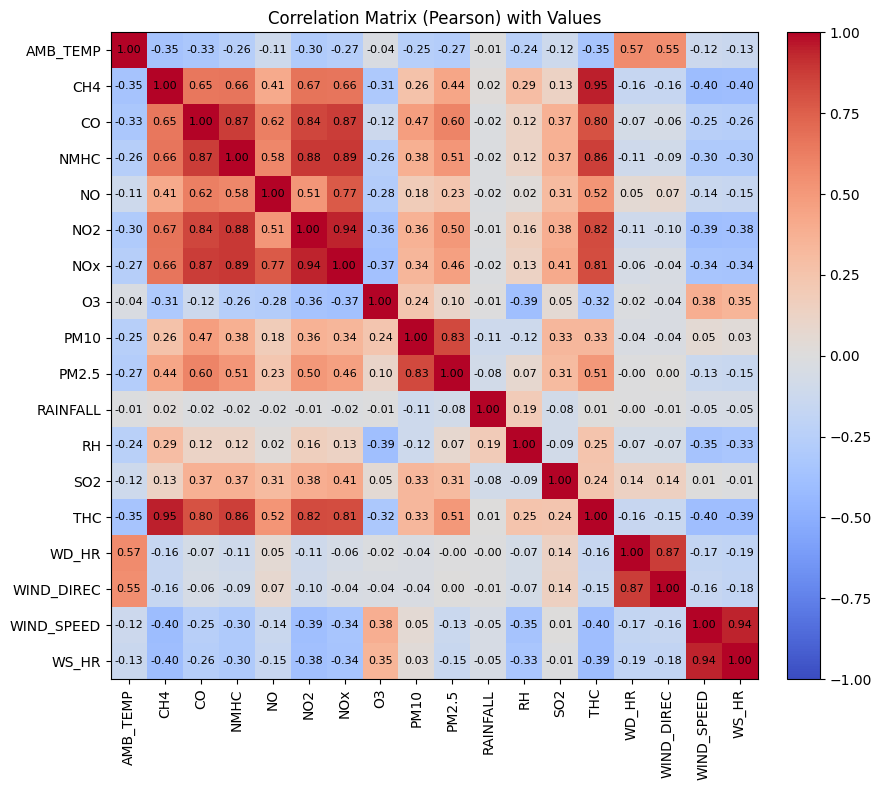

PM2.5 與其他汙染物的相關係數（按絕對值排序）：
            pearson_r
PM10         0.833357
CO           0.601480
NMHC         0.510662
THC          0.506730
NO2          0.500854
NOx          0.464031
CH4          0.436313
SO2          0.307261
AMB_TEMP    -0.273404
NO           0.234085
WS_HR       -0.146592
WIND_SPEED  -0.129408
O3           0.103766
RAINFALL    -0.081303
RH           0.072869
WIND_DIREC   0.003572
WD_HR       -0.000031


In [360]:
TRAIN_PATH = "./train.csv"

# 1) 讀取資料並處理缺值
df = pd.read_csv(TRAIN_PATH)
item_col   = df.columns[2]
df["ItemName"] = df["ItemName"].astype(str).str.strip()
value_cols = df.columns[3:]

df[value_cols] = df[value_cols].replace("NR", np.nan)
df[value_cols] = df[value_cols].apply(pd.to_numeric, errors="coerce")
df[value_cols] = df.groupby(item_col)[value_cols].transform(lambda g: g.fillna(g.median()))

# 2) 展平成 18 條長序列，組成寬表
series_dict = {name: [] for name in df[item_col].unique()}
for _, row in df.iterrows():
    series_dict[row[item_col]].extend(row[value_cols].tolist())
wide = pd.DataFrame({k: np.array(v, dtype=np.float64) for k, v in series_dict.items()})

# 3) 計算相關係數
corr_all = wide.corr(method="pearson")

# 4) 視覺化 + 標上數值
plt.figure(figsize=(9, 8))
im = plt.imshow(corr_all.values, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_all.columns)), corr_all.columns, rotation=90)
plt.yticks(range(len(corr_all.index)),   corr_all.index)
plt.title("Correlation Matrix (Pearson) with Values")

# 在每個格子上標上數值
for i in range(corr_all.shape[0]):
    for j in range(corr_all.shape[1]):
        text = f"{corr_all.iloc[i,j]:.2f}"
        plt.text(j, i, text, ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# 5) PM2.5 與其他的排序輸出（方便查看）
pm25_corr = corr_all.loc["PM2.5"].drop("PM2.5")
pm25_rank = pm25_corr.reindex(pm25_corr.abs().sort_values(ascending=False).index)
print("PM2.5 與其他汙染物的相關係數（按絕對值排序）：")
print(pm25_rank.to_frame(name="pearson_r"))

In [361]:
def load_train_data(path):
    df = pd.read_csv(path + 'train.csv')
    return df

def load_test_data(path):
    df = pd.read_csv(path + 'test.csv', header=None)
    return df

In [362]:
train_df = load_train_data('./')
train_df

,Location,Date,ItemName,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,Hsinchu,1/1 00:00,AMB_TEMP,11.1,11.2,11.4,11.5,11.6,11.7,11.9,...,16.6,16.3,15.6,14.8,14.4,14.5,14.7,14.7,14.6,14.4
1,Hsinchu,1/1 00:00,CH4,2.01,1.99,2,2.02,2.03,2.02,2.02,...,1.98,1.97,1.97,2,2.02,2.01,2.01,2,1.98,1.98
2,Hsinchu,1/1 00:00,CO,0.31,0.28,0.28,0.33,0.32,0.26,0.25,...,0.31,0.29,0.29,0.33,0.34,0.34,0.34,0.29,0.24,0.21
3,Hsinchu,1/1 00:00,NMHC,0.1,0.1,0.08,0.09,0.1,0.07,0.07,...,0.06,0.07,0.08,0.12,0.13,0.1,0.1,0.09,0.05,0.06
4,Hsinchu,1/1 00:00,NO,1.5,1.4,1.4,1.5,1.4,1.3,1.4,...,3.5,2.6,2.3,2,1.8,1.8,1.8,1.7,1.5,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,Hsinchu,12/20 00:00,THC,2.22,2.27,2.2,2.17,2.16,2.2,2.2,...,2.24,2.18,2.3,2.23,2.73,2.71,2.77,2.9,2.8,2.69
4316,Hsinchu,12/20 00:00,WD_HR,61,57,49,55,62,70,71,...,150,184,310,298,165,139,6,143,169,80
4317,Hsinchu,12/20 00:00,WIND_DIREC,72,34,69,52,60,85,41,...,157,207,308,251,178,44,157,98,161,41
4318,Hsinchu,12/20 00:00,WIND_SPEED,0.6,0.7,0.6,0.6,0.7,0.3,0.6,...,0.6,0.3,1.4,1,1.2,0.3,0.7,0.3,0.5,0.3


In [363]:
hours = 9
items = 18
unnessary_items = ['RAINFALL', 'WIND_DIREC', 'RH', 'WD_HR']
# unnessary_items = ['WIND_DIREC', 'WD_HR']
# unnessary_items = []

In [364]:
def data_preprocessing(df):
    hour_cols = [str(i) for i in range(24)]
    # drop location
    df.drop('Location', axis=1, inplace=True)

    df["ItemName"] = df["ItemName"].astype(str).str.strip()

    # convert to numeric
    df[hour_cols] = df[hour_cols].apply(pd.to_numeric, errors="coerce")

    # fill missing value with median of each item
    hour_median = (
        df.groupby("ItemName")[hour_cols]
        .transform(lambda x: x.fillna(x.median()))
    )
    df[hour_cols] = hour_median

    features = [[] for _ in range(items)]
    label = []
    for i, (_, row) in enumerate(df.iterrows()):
        if row.ItemName == 'PM2.5':
            label.extend(row[hour_cols].to_list())
        elif row.ItemName in unnessary_items:
            continue
        idx = i % items
        features[idx].extend(row[hour_cols].to_list())

    features_clean = []
    for i in range(items):
        if len(features[i]) != 0:
            features_clean.append(features[i])

    label = label[hours:]
    features_clean = np.array(features_clean, dtype=np.float64)
    label = np.array(label, dtype=np.float64)
    # label = np.array(label, dtype=np.float64).reshape(-1, 1)

    features_final = []
    for i in range(features_clean.shape[1] - hours):
        # print(features[:, i:i + hours].shape)
        features_final.append(features_clean[:, i:i + hours].reshape(-1))

    features_final = np.array(features_final, dtype=np.float64)

    # print(features_final.shape)
    # print(label.shape)

    return features_final, label
    # return df_new, df_pm25

In [365]:
X, y = data_preprocessing(train_df)

In [366]:
def standardize_fit(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0)
    sd[sd == 0] = 1.0
    return mu, sd

def standardize_apply(X, mu, sd):
    return (X - mu) / sd

In [367]:
def split_data(X, y, test_size=0.2):
    split_index = int(len(X) * (1 - test_size))
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]
    return X_train, X_test, y_train, y_test

In [368]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.1)
# X_test, X_val, y_test, y_val = split_data(X_test, y_test, test_size=0.5)

In [369]:
print(y.std())
print(y_train.std())
# print(y_val.std())
print(y_test.std())

9.569265780720222
9.81852761633493
6.916770379354072


In [370]:
mean, std = standardize_fit(X_train)
X_train = standardize_apply(X_train, mean, std)
# X_val = standardize_apply(X_val, mean, std)
X_test = standardize_apply(X_test, mean, std)
X = standardize_apply(X, mean, std)

In [371]:
def evaluate_rmse_metrics(y_pred, y_true):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [372]:
def compute_rmse_cost(X_train, y_train, theta):
    X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    cost = evaluate_rmse_metrics(y_train, np.matmul(X_train_0, theta))
    return cost

In [373]:
def predict(X_test, theta):
    X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    return X_test_0.dot(theta)

In [374]:
def gradient_descent(X_train, y_train, X_val, y_val, lr, iteration, epsilon=1e-10, reg=False):
    n = X_train.shape[0]
    best_train_history = []
    best_val_history = []
    best_theta = np.zeros(X_train.shape[1] + 1)
    best_lambda = None
    lambda_regs = [0.0, 0.01, 0.03, 0.1, 0.3] if reg else [0.0]

    for lambda_reg in lambda_regs:
        train_history = []
        val_history = []

        X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        theta = np.zeros_like(best_theta)
        grad_sq = np.zeros_like(theta)

        for i in trange(iteration, desc="Training Progress"):
            h = X_train_0.dot(theta) - y_train
            gradient = ((2.0 / n) * np.matmul(X_train_0.T, h))
            if reg:
                gradient[1:] += 2.0 * lambda_reg * theta[1:]

            # grad_sq += gradient ** 2
            # adjusted_lr = lr / (np.sqrt(grad_sq) + epsilon)
            # theta -= adjusted_lr * gradient
            theta -= lr * gradient

            train_rmse = compute_rmse_cost(X_train, y_train, theta)
            val_rmse = compute_rmse_cost(X_val, y_val, theta)
            train_history.append(train_rmse)
            val_history.append(val_rmse)

        print(f'Lambda: {lambda_reg}, Train RMSE: {train_history[-1]}, Val RMSE: {val_history[-1]}')
        if not best_val_history or val_history[-1] < best_val_history[-1]:
            best_train_history = train_history
            best_val_history = val_history
            best_theta = theta
            best_lambda = lambda_reg

    print(f'Best lambda: {best_lambda}')
    return best_theta, np.array(best_train_history), np.array(best_val_history)

Training Progress: 100%|██████████| 10000/10000 [00:08<00:00, 1191.22it/s]


Lambda: 0.0, Train RMSE: 3.9420603113176664, Val RMSE: 3.4893358822163925
Best lambda: 0.0


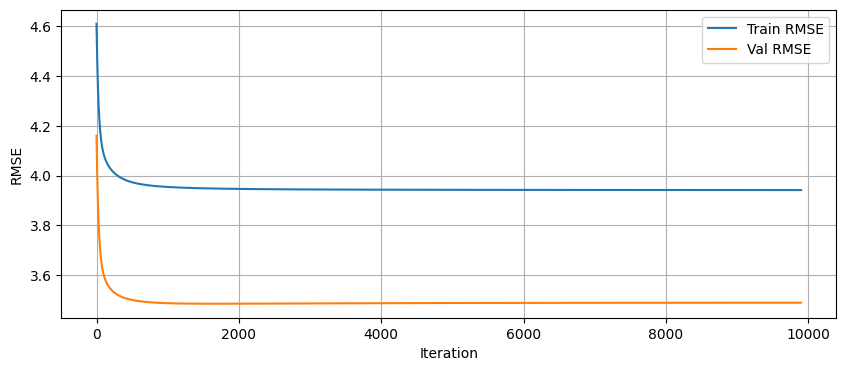

In [375]:
theta_opt, train_loss , val_loss = gradient_descent(
    X_train, y_train,
    # X_val, y_val,
    X_test, y_test,
    lr=0.01,
    iteration=10000,
    # reg=True
)

plt.figure(figsize=(10, 4))
plt.plot(train_loss[100:], label="Train RMSE")
plt.plot(val_loss[100:], label="Val RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


In [376]:
y_test_pred = predict(X_test, theta_opt)
print(evaluate_rmse_metrics(y_test_pred, y_test))

3.4893358822163925


In [377]:
y_train_pred = predict(X_train, theta_opt)
print(evaluate_rmse_metrics(y_train_pred, y_train))
# y_val_pred = predict(X_val, theta_opt)
# print(evaluate_rmse_metrics(y_val_pred, y_val))
y_pred = predict(X, theta_opt)
print(evaluate_rmse_metrics(y_pred, y))

3.9420603113176664
3.899086499675864


In [378]:
test_df = load_test_data('./')

hour_cols = [str(i) for i in range(hours)]
test_df.columns = ['Index', 'ItemName'] + hour_cols

test_df["ItemName"] = test_df["ItemName"].astype(str).str.strip()

test_df[hour_cols] = test_df[hour_cols].apply(pd.to_numeric, errors="coerce")


hour_median = (
    test_df.groupby("ItemName")[hour_cols]
    .transform(lambda x: x.fillna(x.median()))
)
test_df[hour_cols] = hour_median

features_test = [[] for _ in range(items)]
for i, (_, row) in enumerate(test_df.iterrows()):
    if row.ItemName in unnessary_items:
        continue
    idx = i % items
    features_test[idx].extend(row[2:].to_list())


features_clean = []
for i in range(items):
    if len(features_test[i]) != 0:
        features_clean.append(features_test[i])

features_clean = np.array(features_clean, dtype=np.float64)

features_test_final = []
for i in range(0, features_clean.shape[1], hours):
    features_test_final.append(features_clean[:, i:i + hours].reshape(-1))

features_test_final = np.array(features_test_final, dtype=np.float64)


# print(features_test_final.shape)
features_test_final = standardize_apply(features_test_final, mean, std)

y_test_grad = predict(features_test_final, theta_opt)

index_col = []
for i in range(len(y_test_grad)):
    index_col.append(f'index_{i}')

submission_df = pd.DataFrame({
    'index': index_col,
    'answer': y_test_grad
})
submission_df.to_csv('grad.csv', index=False)